In [555]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import  LinearSVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn import X


In [556]:
file_path = 'Downloads/DataLaserCladding.csv'
df = pd.read_csv(file_path)

In [557]:
df.shape

(36, 7)

In [558]:
# sns.pairplot(df)

In [559]:
correlation_matrix = df.corr()

In [560]:
correlation_matrix


,Tilt Angle,Power,FeedRate,Scanning Speed,Width,Height,Peak Shift
Tilt Angle,1.000000e+00,-1.894781e-17,1.767938e-16,-5.289596e-16,0.000167,0.147202,0.066445
Power,-1.894781e-17,1.000000e+00,-4.351848e-17,5.684342e-17,0.878924,0.223812,0.282219
FeedRate,1.767938e-16,-4.351848e-17,1.000000e+00,-6.648656e-17,0.261930,0.824657,-0.583274
Scanning Speed,-5.289596e-16,5.684342e-17,-6.648656e-17,1.000000e+00,-0.100075,-0.334815,0.192484
Width,1.673503e-04,8.789239e-01,2.619304e-01,-1.000755e-01,1.000000,0.472887,0.092725
Height,1.472017e-01,2.238119e-01,8.246567e-01,-3.348150e-01,0.472887,1.000000,-0.485020
Peak Shift,6.644471e-02,2.822188e-01,-5.832743e-01,1.924842e-01,0.092725,-0.485020,1.000000


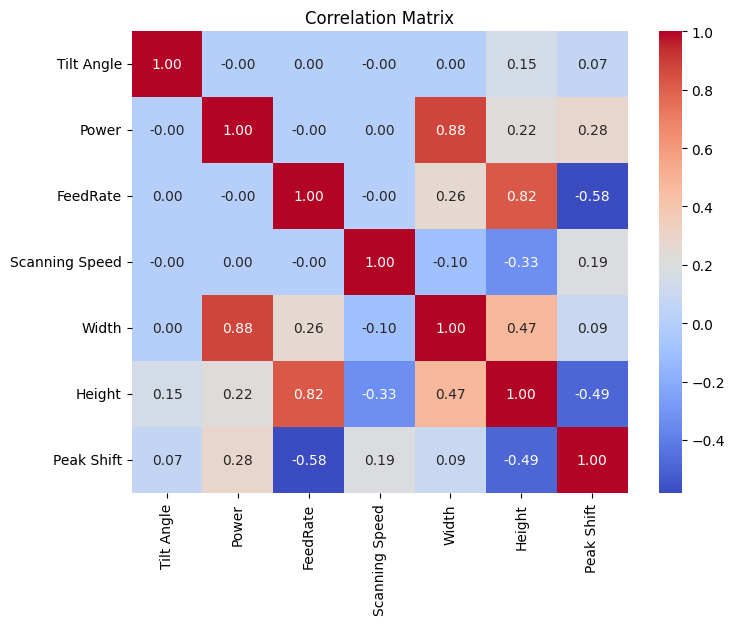

In [561]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

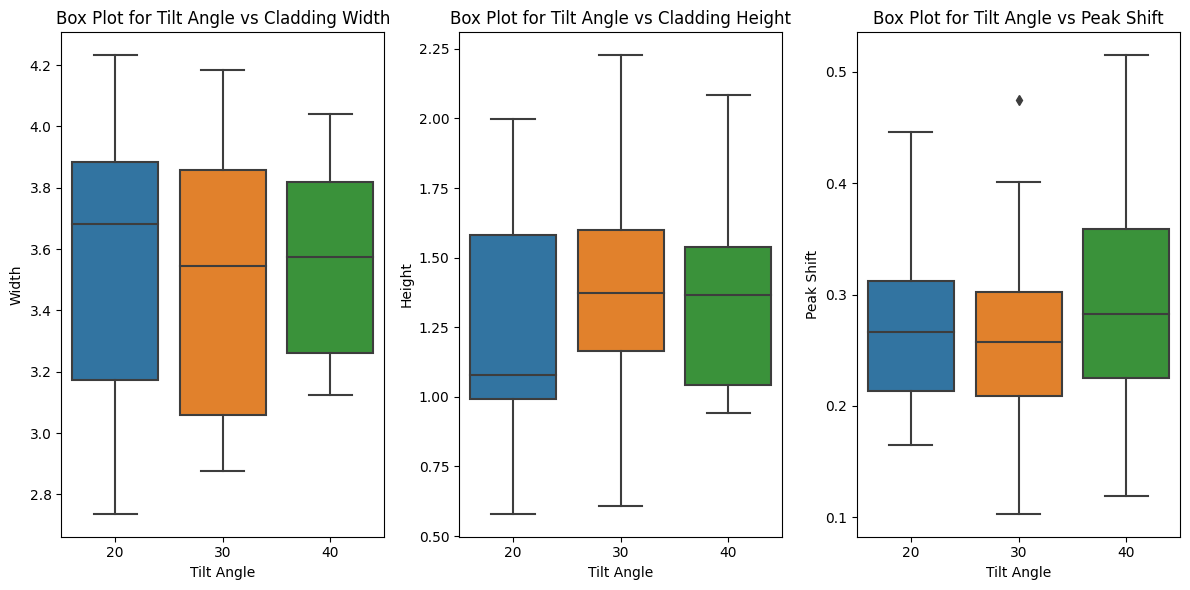

In [563]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Tilt Angle', y='Width', data=df)
plt.title('Box Plot for Tilt Angle vs Cladding Width')

plt.subplot(1, 3, 2)
sns.boxplot(x='Tilt Angle', y='Height', data=df)
plt.title('Box Plot for Tilt Angle vs Cladding Height')
plt.subplot(1, 3, 3)
sns.boxplot(x='Tilt Angle', y='Peak Shift', data=df)
plt.title('Box Plot for Tilt Angle vs Peak Shift')

plt.tight_layout()
plt.show()

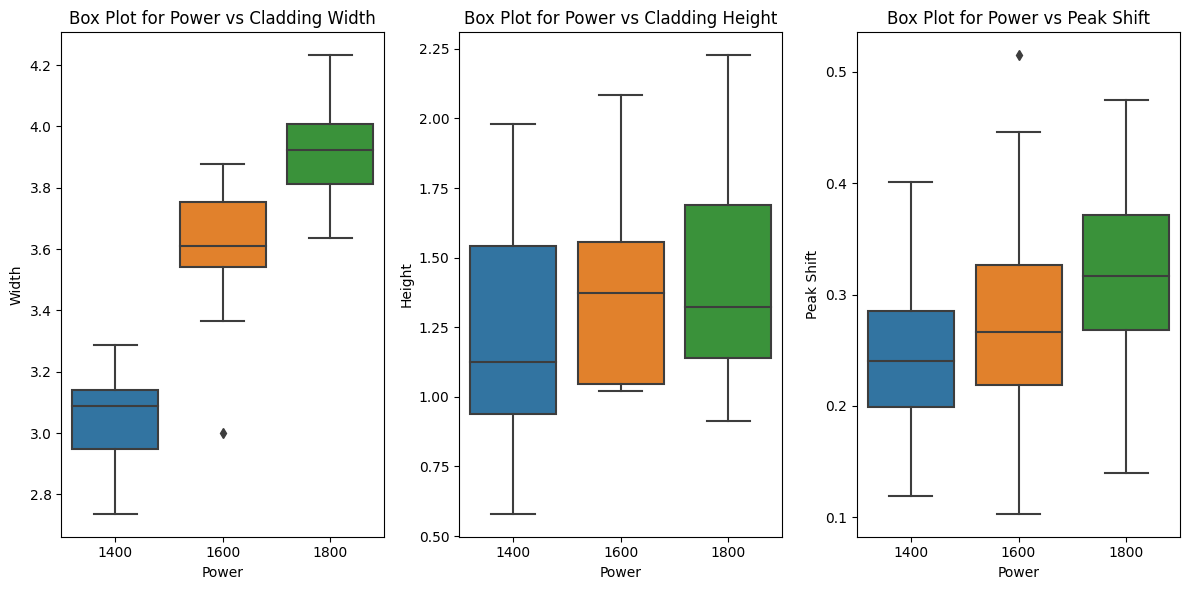

In [564]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Power', y='Width', data=df)
plt.title('Box Plot for Power vs Cladding Width')

plt.subplot(1, 3, 2)
sns.boxplot(x='Power', y='Height', data=df)
plt.title('Box Plot for Power vs Cladding Height')
plt.subplot(1, 3, 3)
sns.boxplot(x='Power', y='Peak Shift', data=df)
plt.title('Box Plot for Power vs Peak Shift')

plt.tight_layout()
plt.show()

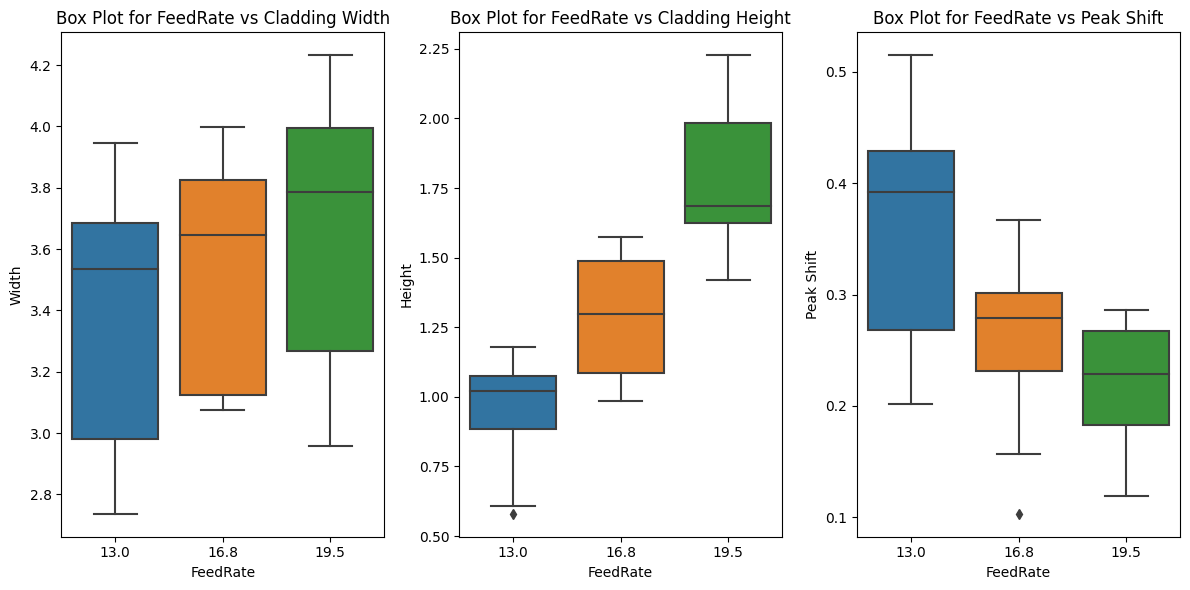

In [565]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='FeedRate', y='Width', data=df)
plt.title('Box Plot for FeedRate vs Cladding Width')

plt.subplot(1, 3, 2)
sns.boxplot(x='FeedRate', y='Height', data=df)
plt.title('Box Plot for FeedRate vs Cladding Height')
plt.subplot(1, 3, 3)
sns.boxplot(x='FeedRate', y='Peak Shift', data=df)
plt.title('Box Plot for FeedRate vs Peak Shift')

plt.tight_layout()
plt.show()

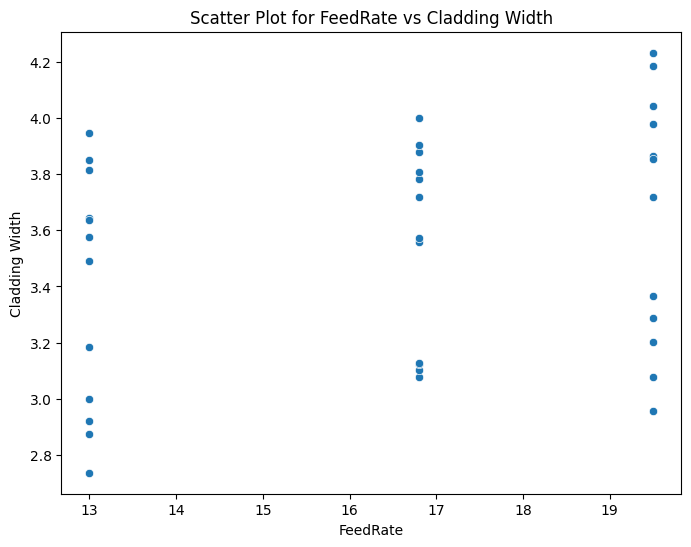

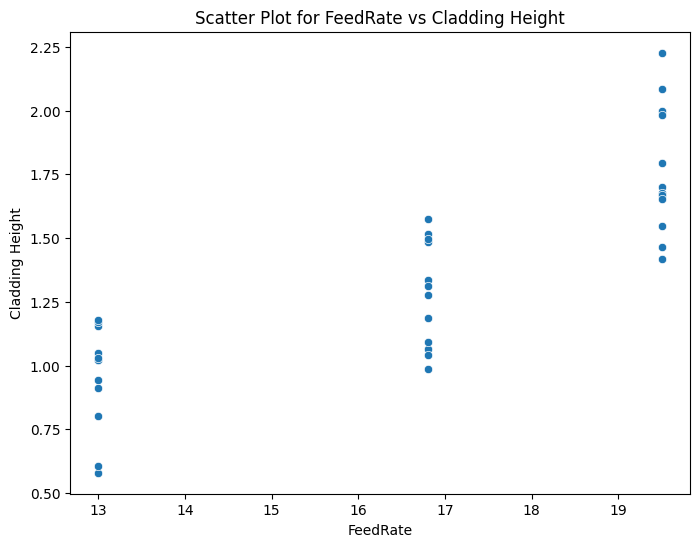

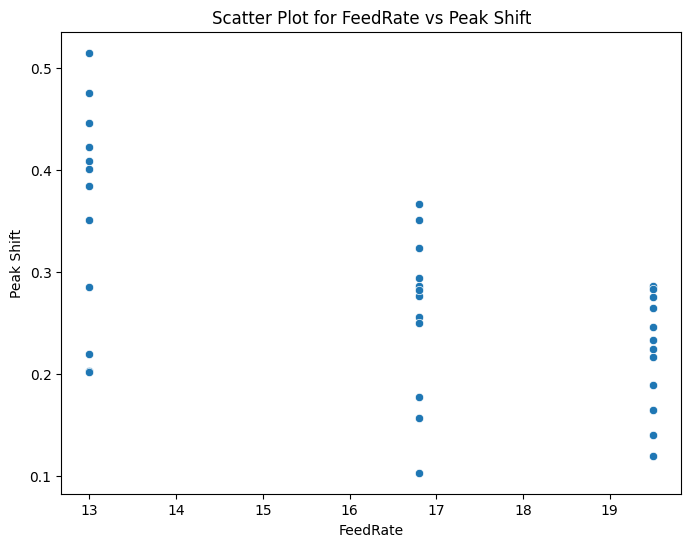

In [566]:
plt.figure(figsize=(8, 6))

# Scatter plot for FeedRate vs Width
sns.scatterplot(x='FeedRate', y='Width', data=df)

plt.title('Scatter Plot for FeedRate vs Cladding Width')
plt.xlabel('FeedRate')
plt.ylabel('Cladding Width')

plt.show()
# Scatter plot for FeedRate vs Height
plt.figure(figsize=(8, 6))
sns.scatterplot(x='FeedRate', y='Height', data=df)
plt.title('Scatter Plot for FeedRate vs Cladding Height')
plt.xlabel('FeedRate')
plt.ylabel('Cladding Height')
plt.show()

# Scatter plot for FeedRate vs Peak Shift
plt.figure(figsize=(8, 6))
sns.scatterplot(x='FeedRate', y='Peak Shift', data=df)
plt.title('Scatter Plot for FeedRate vs Peak Shift')
plt.xlabel('FeedRate')
plt.ylabel('Peak Shift')
plt.show()


<AxesSubplot: xlabel='FeedRate', ylabel='Width'>

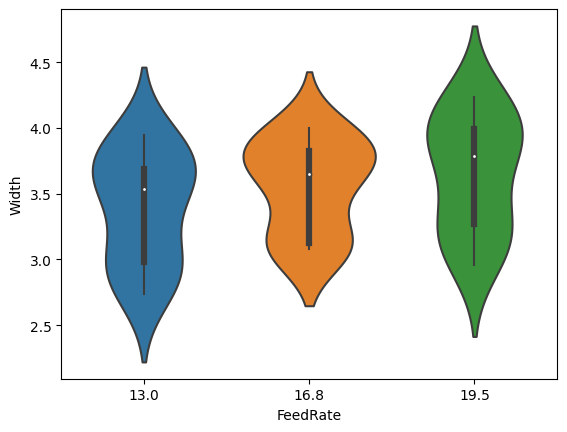

In [567]:
# Violin plot for FeedRate vs Width
sns.violinplot(x='FeedRate', y='Width', data=df)


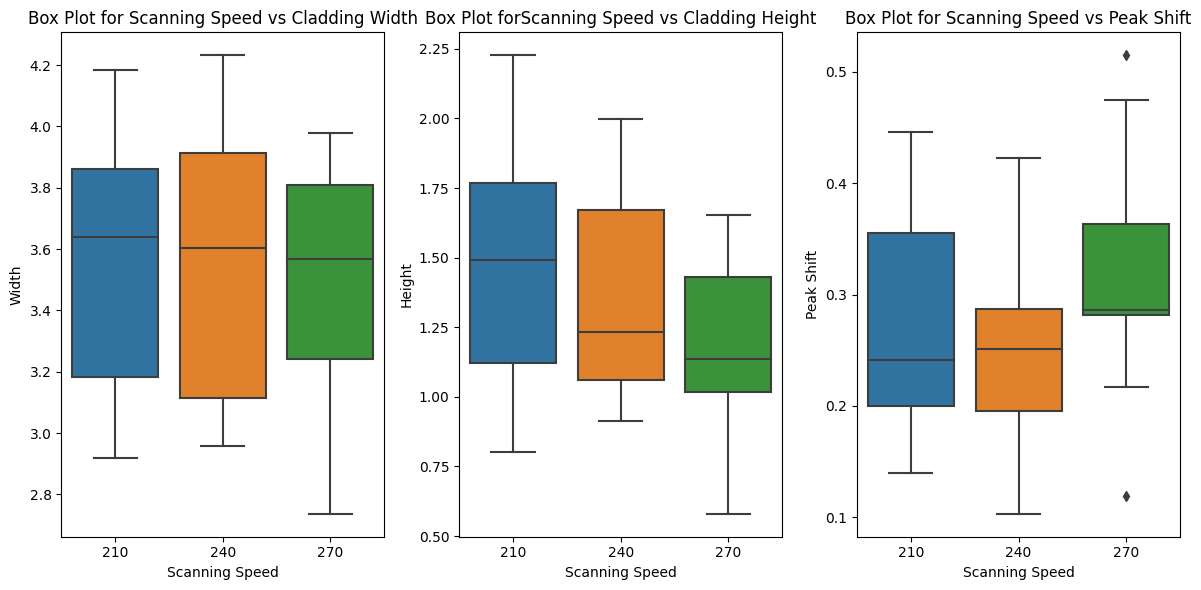

In [568]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Scanning Speed', y='Width', data=df)
plt.title('Box Plot for Scanning Speed vs Cladding Width')

plt.subplot(1, 3, 2)
sns.boxplot(x='Scanning Speed', y='Height', data=df)
plt.title('Box Plot forScanning Speed vs Cladding Height')
plt.subplot(1, 3, 3)
sns.boxplot(x='Scanning Speed', y='Peak Shift', data=df)
plt.title('Box Plot for Scanning Speed vs Peak Shift')

plt.tight_layout()
plt.show()

In [569]:

features = df[['Tilt Angle', 'Power', 'FeedRate', 'Scanning Speed']]
target_width = df['Width']
target_height = df['Height']
target_shift = df['Peak Shift']


X_train, X_test, y_width_train, y_width_test, y_height_train, y_height_test, y_shift_train, y_shift_test = train_test_split(
    features, target_width, target_height, target_shift, test_size=0.2, random_state=42
)


In [570]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
models = {
    "SVR": {
        "width": SVR(kernel='rbf', gamma=0.11, C=30),
        "height": SVR(kernel='rbf', gamma=0.07, C=50),
        "shift": SVR(kernel='rbf', gamma=0.04, C=109)
    },
    "XGBoost": {
        "width": XGBRegressor(objective='reg:squarederror', n_estimators=17, max_depth=1, min_child_weight=4, gamma=0.1, subsample=1, learning_rate=0.6),
        "height": XGBRegressor(objective='reg:squarederror', n_estimators=16, max_depth=2, min_child_weight=4, gamma=0, subsample=1, learning_rate=0.2),
        "shift": XGBRegressor(objective='reg:squarederror', n_estimators=13, max_depth=1, min_child_weight=7, gamma=0, subsample=1, learning_rate=0.3)
    },
    "LinearRegression": {
        "width": LinearRegression(),
        "height": LinearRegression(),
        "shift": LinearRegression()
    },
    "GradientBoosting": {
        "width": GradientBoostingRegressor(),
        "height": GradientBoostingRegressor(),
        "shift": GradientBoostingRegressor()
    }
}

for model_type, model_dict in models.items():
    print("\n")
    print(f"{model_type} Models:")
    
    for label, model in model_dict.items():
        model.fit(X_train, globals()[f"y_{label}_train"])
        y_pred = model.predict(X_test)

        rmse = mean_squared_error(globals()[f"y_{label}_test"], y_pred, squared=False)
        mae = mean_absolute_error(globals()[f"y_{label}_test"], y_pred)


        print(f"{label} Model:")
        print(f"RMSE: {rmse}")
        print(f"MAE: {mae}")

        
        
        



SVR Models:
width Model:
RMSE: 0.3736248202040284
MAE: 0.34356014613782715
height Model:
RMSE: 0.35654339487209674
MAE: 0.27936207959339043
shift Model:
RMSE: 0.13261420835884152
MAE: 0.11763917918161082


XGBoost Models:
width Model:
RMSE: 0.11929458982682428
MAE: 0.09869317221641544
height Model:
RMSE: 0.17349559467729123
MAE: 0.1442627002000809
shift Model:
RMSE: 0.11239666467283595
MAE: 0.08909930762648582


LinearRegression Models:
width Model:
RMSE: 0.1530010877383678
MAE: 0.12335211947588087
height Model:
RMSE: 0.12899054424229994
MAE: 0.10518650815281791
shift Model:
RMSE: 0.1116089001794185
MAE: 0.08781973671067446


GradientBoosting Models:
width Model:
RMSE: 0.14777431202390723
MAE: 0.1188596941089809
height Model:
RMSE: 0.13715107715109048
MAE: 0.1208704707163669
shift Model:
RMSE: 0.11862591016626087
MAE: 0.09905123148206409


In [572]:
import numpy as np  

def predict_height_width_shift(input_features, models):
   
    tilt_angle, power, feed_rate, scanning_speed = input_features
    
    
    input_features = np.array([[tilt_angle, power, feed_rate, scanning_speed]])
    
  
    predictions = {}
    
   
    for model_type, model_dict in models.items():
        predictions[model_type] = {}
        
      
        predictions[model_type]['width'] = model_dict['width'].predict(input_features)[0]
        predictions[model_type]['height'] = model_dict['height'].predict(input_features)[0]
        predictions[model_type]['shift'] = model_dict['shift'].predict(input_features)[0]
        
   
    return predictions

# Example usage:
input_features = (10, 1922, 11, 261)  # Example input features (Tilt Angle, Power, Feed Rate, Scanning Speed)
predictions = predict_height_width_shift(input_features, models)

# Printing the predictions
for model_type, prediction in predictions.items():
    print(f"{model_type} Predictions:")
    print(f"Width: {prediction['width']}")
    print(f"Height: {prediction['height']}")
    print(f"Peak Shift: {prediction['shift']}")
    print("\n")


SVR Predictions:
Width: 3.5584699084642426
Height: 1.3502286595145194
Peak Shift: 0.3154370821758369


XGBoost Predictions:
Width: 3.8196499347686768
Height: 0.9918434023857117
Peak Shift: 0.3357541859149933


LinearRegression Predictions:
Width: 4.001455740278369
Height: 0.6358067934215899
Peak Shift: 0.41538579903963657


GradientBoosting Predictions:
Width: 3.9125489715328685
Height: 0.9177762129647837
Peak Shift: 0.47299996159258434




C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
 